In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical


df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.dropna(inplace=True)


if 'Blood Pressure' in df.columns:
 
    bp_split = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
    df['Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
    df.drop(columns=['Blood Pressure'], inplace=True)


df.dropna(inplace=True)


categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=52)



In [2]:
# rnn_model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/30


C:\Users\soumith\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.4923 - loss: 0.7406 - val_accuracy: 0.7200 - val_loss: 0.6604
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5778 - loss: 0.6503 - val_accuracy: 0.6400 - val_loss: 0.6253
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6151 - loss: 0.5752 - val_accuracy: 0.6400 - val_loss: 0.6046
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7366 - loss: 0.5107 - val_accuracy: 0.6400 - val_loss: 0.5914
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8540 - loss: 0.4805 - val_accuracy: 0.6400 - val_loss: 0.5817
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8701 - loss: 0.4575 - val_accuracy: 0.6400 - val_loss: 0.5757
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8828 - loss: 0.4150 - val_accuracy: 0.6400 - val_loss: 0.5712
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9228 - loss: 0.3937 - val_accuracy: 0.6400 - val_loss: 0.5677
Epoch 9/30

In [3]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
rnn_model = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8710 - loss: 0.3259
Test Accuracy: 0.8710
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


In [4]:
rnn_model.shape

(31, 2)

In [5]:

# LSTM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.dropna(inplace=True)

if 'Blood Pressure' in df.columns:
    bp_split = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
    df['Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
    df.drop(columns=['Blood Pressure'], inplace=True)

df.dropna(inplace=True)

categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=52)

model = Sequential()
model.add(LSTM(128, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

lstm_model = model.predict(X_test)
y_pred_classes = np.argmax(lstm_model, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=label_encoders['Sleep Disorder'].classes_))


Epoch 1/40


C:\Users\soumith\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.4519 - loss: 0.6961 - val_accuracy: 0.7600 - val_loss: 0.6527
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7189 - loss: 0.6509 - val_accuracy: 0.7600 - val_loss: 0.6318
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8260 - loss: 0.6163 - val_accuracy: 0.7600 - val_loss: 0.6127
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8983 - loss: 0.5819 - val_accuracy: 0.7600 - val_loss: 0.5942
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8918 - loss: 0.5488 - val_accuracy: 0.7600 - val_loss: 0.5735
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9063 - loss: 0.5078 - val_accuracy: 0.7600 - val_loss: 0.5532
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8731 - loss: 0.4872 - val_accuracy: 0.7600 - val_loss: 0.5367
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9043 - loss: 0.4231 - val_accuracy: 0.7600 - val_loss: 0.5229
Epoch 9/40

In [6]:
# GRU 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.dropna(inplace=True)

if 'Blood Pressure' in df.columns:
    bp_split = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
    df['Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
    df.drop(columns=['Blood Pressure'], inplace=True)

df.dropna(inplace=True)

categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=52)

model = Sequential()
model.add(GRU(128, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

gru_model = model.predict(X_test)
y_pred_classes = np.argmax(gru_model, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=label_encoders['Sleep Disorder'].classes_))


Epoch 1/40


C:\Users\soumith\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.5797 - loss: 0.6767 - val_accuracy: 0.8400 - val_loss: 0.6129
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9383 - loss: 0.5552 - val_accuracy: 0.8400 - val_loss: 0.5694
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8878 - loss: 0.5193 - val_accuracy: 0.8000 - val_loss: 0.5394
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9248 - loss: 0.4369 - val_accuracy: 0.8000 - val_loss: 0.5212
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9259 - loss: 0.4026 - val_accuracy: 0.8000 - val_loss: 0.5060
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9475 - loss: 0.3588 - val_accuracy: 0.7600 - val_loss: 0.5004
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9043 - loss: 0.3250 - val_accuracy: 0.7600 - val_loss: 0.4992
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9187 - loss: 0.3103 - val_accuracy: 0.7600 - val_loss: 0.5005
Epoch 9/40

In [7]:
rnn_preds = rnn_model
lstm_preds = lstm_model
gru_preds = gru_model

avg_preds = (rnn_preds + lstm_preds + gru_preds) / 3
final_preds = np.argmax(avg_preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, final_preds)
print(f"Ensemble Accuracy: {accuracy:.4f}")


Ensemble Accuracy: 0.8710


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df['Sleep_Disorder_Encoded'] = LabelEncoder().fit_transform(df['Sleep Disorder'])
df = df.drop(columns=['Person ID', 'Sleep Disorder'])
df = pd.get_dummies(df)
saved_columns = df.drop(columns=['Sleep_Disorder_Encoded']).columns.tolist()

X = df.drop(columns=['Sleep_Disorder_Encoded'])
y = df['Sleep_Disorder_Encoded']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_cat = to_categorical(y)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.2, random_state=42)

def build_model(cell_type):
    model = Sequential()
    if cell_type == 'rnn':
        model.add(SimpleRNN(64, input_shape=(1, X_train.shape[2])))
    elif cell_type == 'lstm':
        model.add(LSTM(64, input_shape=(1, X_train.shape[2])))
    elif cell_type == 'gru':
        model.add(GRU(64, input_shape=(1, X_train.shape[2])))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_cat.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

rnn_model = build_model('rnn')
lstm_model = build_model('lstm')
gru_model = build_model('gru')

rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

rnn_preds = rnn_model.predict(X_test)
lstm_preds = lstm_model.predict(X_test)
gru_preds = gru_model.predict(X_test)

avg_preds = (rnn_preds + lstm_preds + gru_preds) / 3
final_preds = np.argmax(avg_preds, axis=1)
true_labels = np.argmax(y_test, axis=1)
acc = accuracy_score(true_labels, final_preds)
print(f"\nEnsemble Accuracy: {acc:.4f}")

new_person = {
    'Age': 35,
    'Gender': 'Male',
    'Occupation': 'Software Engineer',
    'Sleep Duration': 7.5,
    'Quality of Sleep': 7,
    'Physical Activity Level': 42,
    'Stress Level': 5,
    'BMI Category': 'Normal',
    'Heart Rate': 72,
    'Daily Steps': 6500
}

new_df = pd.DataFrame([new_person])
new_df = pd.get_dummies(new_df)
for col in saved_columns:
    if col not in new_df.columns:
        new_df[col] = 0
new_df = new_df[saved_columns]
new_scaled = scaler.transform(new_df)
new_reshaped = new_scaled.reshape(new_scaled.shape[0], 1, new_scaled.shape[1])

rnn_pred = rnn_model.predict(new_reshaped)
lstm_pred = lstm_model.predict(new_reshaped)
gru_pred = gru_model.predict(new_reshaped)

avg_new_pred = (rnn_pred + lstm_pred + gru_pred) / 3
predicted_class = np.argmax(avg_new_pred, axis=1)[0]
label_map = {0: 'Insomnia', 1: 'None', 2: 'Sleep Apnea'}
print(f"Predicted Sleep Disorder: {label_map[predicted_class]}")


C:\Users\soumith\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/stepWARNING:tensorflow:5 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001CE5691EC00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

Ensemble Accuracy: 0.8933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━

<Figure size 500x400 with 0 Axes>

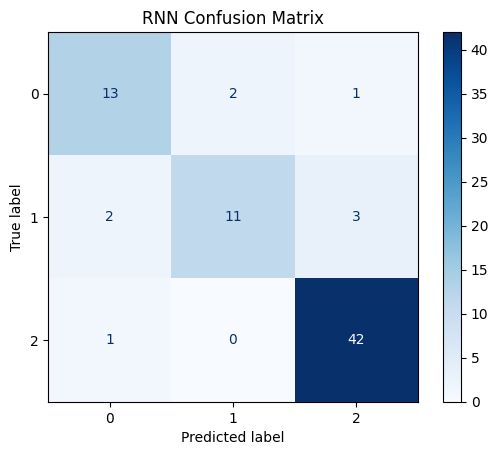

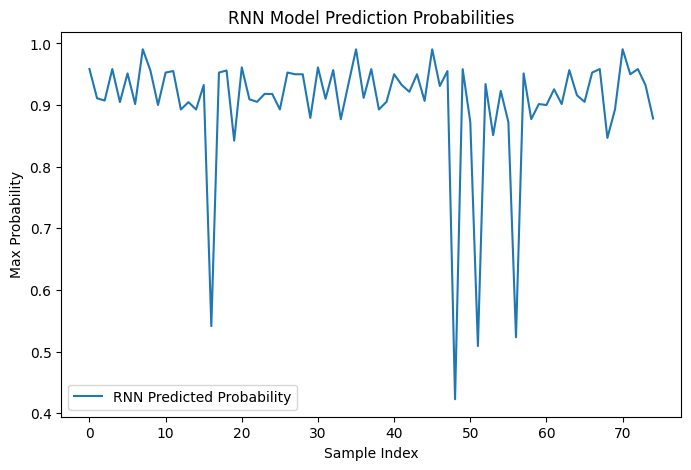

<Figure size 500x400 with 0 Axes>

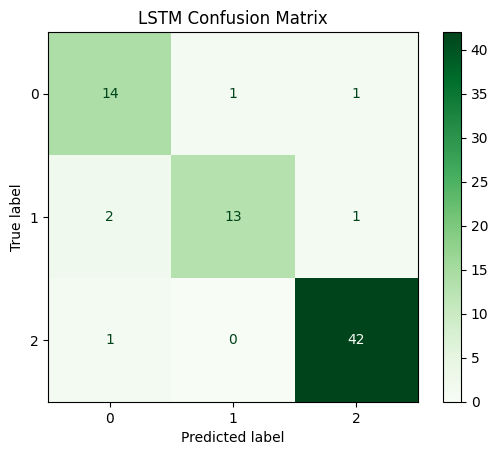

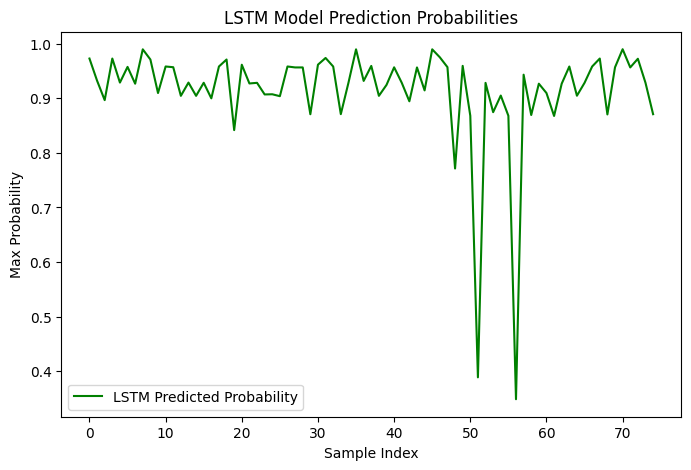

<Figure size 500x400 with 0 Axes>

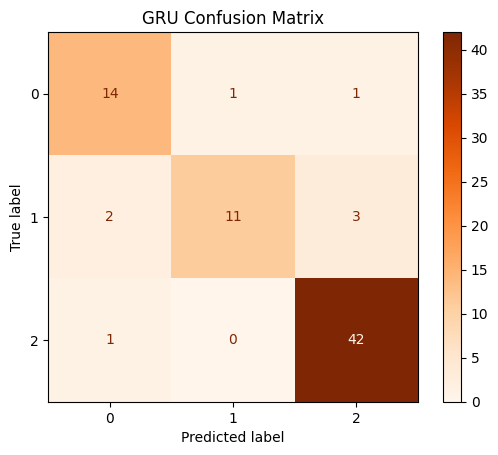

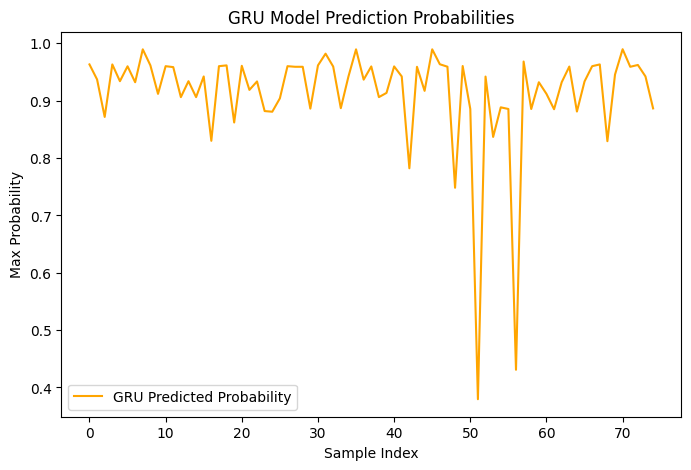

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# RNN predictions and metrics
rnn_pred_classes = np.argmax(rnn_preds, axis=1)
rnn_cm = confusion_matrix(true_labels, rnn_pred_classes)
rnn_disp = ConfusionMatrixDisplay(confusion_matrix=rnn_cm)
plt.figure(figsize=(5,4))
rnn_disp.plot(cmap='Blues')
plt.title("RNN Confusion Matrix")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(np.max(rnn_preds, axis=1), label='RNN Predicted Probability')
plt.title("RNN Model Prediction Probabilities")
plt.xlabel("Sample Index")
plt.ylabel("Max Probability")
plt.legend()
plt.show()

# LSTM predictions and metrics
lstm_pred_classes = np.argmax(lstm_preds, axis=1)
lstm_cm = confusion_matrix(true_labels, lstm_pred_classes)
lstm_disp = ConfusionMatrixDisplay(confusion_matrix=lstm_cm)
plt.figure(figsize=(5,4))
lstm_disp.plot(cmap='Greens')
plt.title("LSTM Confusion Matrix")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(np.max(lstm_preds, axis=1), label='LSTM Predicted Probability', color='green')
plt.title("LSTM Model Prediction Probabilities")
plt.xlabel("Sample Index")
plt.ylabel("Max Probability")
plt.legend()
plt.show()

# GRU predictions and metrics
gru_pred_classes = np.argmax(gru_preds, axis=1)
gru_cm = confusion_matrix(true_labels, gru_pred_classes)
gru_disp = ConfusionMatrixDisplay(confusion_matrix=gru_cm)
plt.figure(figsize=(5,4))
gru_disp.plot(cmap='Oranges')
plt.title("GRU Confusion Matrix")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(np.max(gru_preds, axis=1), label='GRU Predicted Probability', color='orange')
plt.title("GRU Model Prediction Probabilities")
plt.xlabel("Sample Index")
plt.ylabel("Max Probability")
plt.legend()
plt.show()

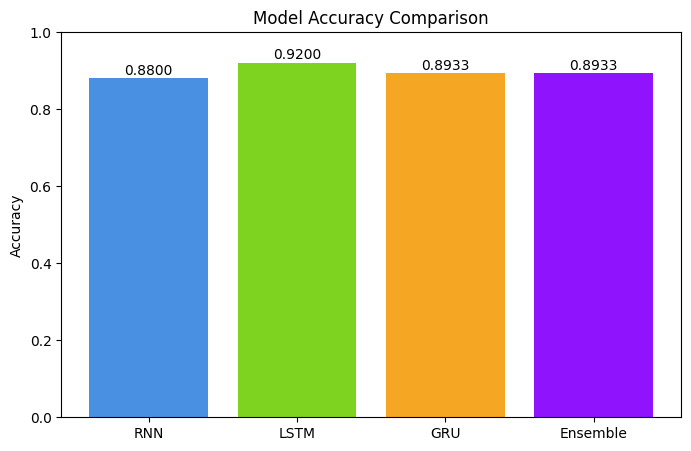

In [12]:
import matplotlib.pyplot as plt

# Calculate accuracy for each model
rnn_acc = (rnn_pred_classes == true_labels).mean()
lstm_acc = (lstm_pred_classes == true_labels).mean()
gru_acc = (gru_pred_classes == true_labels).mean()
ensemble_acc = (final_preds == true_labels).mean()

# Plot comparison
model_names = ['RNN', 'LSTM', 'GRU', 'Ensemble']
accuracies = [rnn_acc, lstm_acc, gru_acc, ensemble_acc]

plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, color=['#4A90E2', '#7ED321', '#F5A623', '#9013FE'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center')
plt.show()